### To predict diabetes using PIMA diabetes data

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Parameter information
#### num_preg(Pregnancies) : Number of times pregnant
#### glucose_conc(Glucose) : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#### diastolic_bp(BloodPressure) : Diastolic blood pressure (mm Hg)
#### thickness(SkinThickness) : Triceps skin fold thickness (mm)
#### insulin(Insulin) : 2-Hour serum insulin (mu U/ml)
#### bmi : Body mass index (weight in kg/(height in m)^2)
#### diab_pred(DiabetesPedigreeFunction) : Diabetes pedigree function
#### age : Age (years)
#### skin : Triceps skin fold thickness (mm)
#### diabetes : Class variable (0 or 1)



### Importing libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [39]:
data=pd.read_csv("data.csv")
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [40]:
data.shape

(768, 10)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


### Check the how meny zero values present in each column of the dataset

In [42]:
for i in ['glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']:
    print(f"number of rows missing glucose_conc {i} :",len(data.loc[data[i] == 0]))

number of rows missing glucose_conc glucose_conc : 5
number of rows missing glucose_conc diastolic_bp : 35
number of rows missing glucose_conc thickness : 227
number of rows missing glucose_conc insulin : 374
number of rows missing glucose_conc bmi : 11
number of rows missing glucose_conc diab_pred : 0
number of rows missing glucose_conc age : 0


In [43]:
for i in ['glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']:
    data[i].replace(0,data[i].mean(),inplace=True)

In [44]:
for i in ['glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']:
    print(f"number of rows missing glucose_conc {i} :",len(data.loc[data[i] == 0]))

number of rows missing glucose_conc glucose_conc : 0
number of rows missing glucose_conc diastolic_bp : 0
number of rows missing glucose_conc thickness : 0
number of rows missing glucose_conc insulin : 0
number of rows missing glucose_conc bmi : 0
number of rows missing glucose_conc diab_pred : 0
number of rows missing glucose_conc age : 0


In [45]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
data['diabetes']=a.fit_transform(data['diabetes'])

<AxesSubplot:>

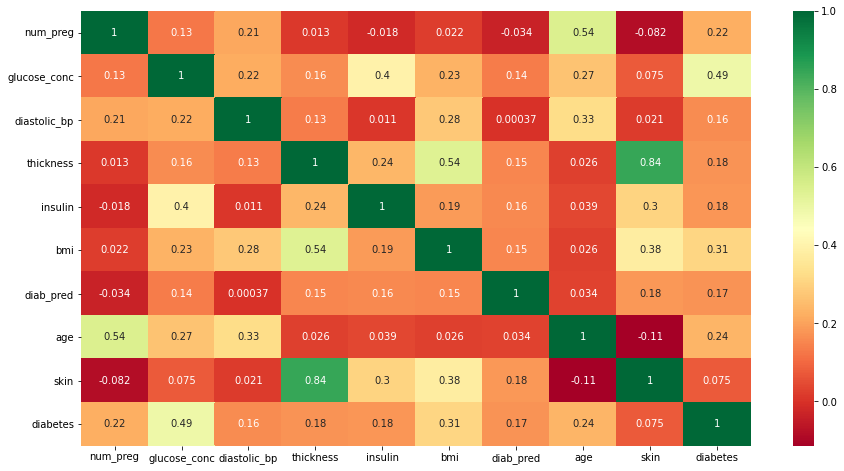

In [46]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

In [47]:
diabetes_true_count = len(data.loc[data['diabetes'] == True])
diabetes_false_count = len(data.loc[data['diabetes'] == False])

In [49]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [59]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [57]:
!pip install imblearn

In [60]:
from imblearn.over_sampling import SMOTE
s1=SMOTE()
x2_data,y2_data=s1.fit_resample(x,y)        ##data la under sampling karun navin x and y tayar kele
print(x2_data.shape,y2_data.shape)

(1000, 9) (1000,)


In [61]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2_data,y2_data,test_size=0.2,random_state=2) 

<IPython.core.display.Javascript object>

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [76]:
log_clf=LogisticRegression()
ran_clf= RandomForestClassifier()
svm_clf=SVC()
nbg_clf=GaussianNB()

In [80]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier(estimators=[('lr',log_clf),('nb',log_clf),('svc',svm_clf)],voting='hard')

for clf in (log_clf,ran_clf,svm_clf,nbg_clf,voting_clf):
    clf.fit(x2_train,y2_train)
    y_pred=clf.predict(x2_test)
    print(accuracy_score(y2_test,y_pred))

C:\Users\Sai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.79
0.84
0.78
0.705
0.79


C:\Users\Sai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

In [81]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ran_clf,x2_train,y2_train.ravel(),cv=10)

In [83]:
score.round(2)

array([0.76, 0.84, 0.8 , 0.89, 0.79, 0.78, 0.91, 0.71, 0.86, 0.85])

In [84]:
score.mean()

0.81875

In [85]:
score.var()

0.0034453124999999996